# Texas Housing Prices

---

This project is part of my "100 Days of Data Projects."

With this data, I hope to build and compare regression models for predicting housing prices in Austin, Texas.

---

This dataset consists of about 15.2K house records of Zillow home listings and 47 features.

Source: https://www.kaggle.com/datasets/ericpierce/austinhousingprices

---

# Import Data and Packages

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


data = pd.read_csv("texas_housing_prices.csv")

print(data.shape)

(15171, 47)


---

# Train-Test Split

In [26]:
# import package for splitting
from sklearn.model_selection import train_test_split

# declare our X inputs and y outcomes
X = data.drop("latestPrice", axis=1)
y = data["latestPrice"]

# split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    #stratify=y, 
                                                    test_size=0.2)

print("X_train.shape = ", X_train.shape)
print("X_test.shape = ", X_test.shape)

print("y_train.shape = ", y_train.shape)
print("y_test.shape = ", y_test.shape)

# print("\n")
# print("y_train class proportions: \n", y_train.value_counts(normalize=True))

# print("\n")
# print("y_test class proportions: \n", y_test.value_counts(normalize=True))

X_train.shape =  (12136, 46)
X_test.shape =  (3035, 46)
y_train.shape =  (12136,)
y_test.shape =  (3035,)


---

# Exploratory Analysis on the Train Data

1) Get to know each feature:
- Name
- Type
- Missing Values
- Noise (Stocastic, outliers, rounding errors, e.t.c.)
- Usefulness for the task at hand
- Distribution type (Gaussian, uniform, logarithmic, e.t.c)

2) Identify the target attribute.

3) Visualize the data.

4) Study the correlations b/w attributes.

5) Identify what transformations to the features you might want to apply.

6) Document what you have learned.

   

### Check Data Types

In [27]:
# check the data types

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15171 entries, 0 to 15170
Data columns (total 47 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   zpid                        15171 non-null  int64  
 1   city                        15171 non-null  object 
 2   streetAddress               15171 non-null  object 
 3   zipcode                     15171 non-null  int64  
 4   description                 15171 non-null  object 
 5   latitude                    15171 non-null  float64
 6   longitude                   15171 non-null  float64
 7   propertyTaxRate             15171 non-null  float64
 8   garageSpaces                15171 non-null  int64  
 9   hasAssociation              15171 non-null  bool   
 10  hasCooling                  15171 non-null  bool   
 11  hasGarage                   15171 non-null  bool   
 12  hasHeating                  15171 non-null  bool   
 13  hasSpa                      151

In [28]:
data.describe()

,zpid,zipcode,latitude,longitude,propertyTaxRate,garageSpaces,parkingSpaces,yearBuilt,latestPrice,numPriceChanges,latest_salemonth,latest_saleyear,numOfPhotos,numOfAccessibilityFeatures,numOfAppliances,numOfParkingFeatures,numOfPatioAndPorchFeatures,numOfSecurityFeatures,numOfWaterfrontFeatures,numOfWindowFeatures,numOfCommunityFeatures,lotSizeSqFt,livingAreaSqFt,numOfPrimarySchools,numOfElementarySchools,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories
count,1.517100e+04,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,1.517100e+04,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,1.517100e+04,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000
mean,1.044193e+08,78735.932964,30.291596,-97.778532,1.994085,1.229187,1.224507,1988.554743,5.127677e+05,3.032892,6.733043,2019.078241,30.640432,0.012985,3.474722,1.710105,0.663371,0.466878,0.002768,0.208490,0.018852,1.190840e+05,2208.323314,0.940676,0.049173,1.035990,0.976798,1.838495,5.779912,1237.304660,14.857228,2.683010,3.440380,1.467273
std,3.179426e+08,18.893475,0.096973,0.084715,0.053102,1.352117,1.352732,21.579458,4.531853e+05,2.487392,3.146760,0.813941,21.175174,0.179438,1.893351,0.788641,0.983779,0.824481,0.061771,0.488331,0.206775,1.225272e+07,1378.576119,0.236516,0.234937,0.263633,0.292043,1.068376,1.860276,326.513311,1.741857,1.054445,0.849942,0.523697
min,2.858495e+07,78617.000000,30.085030,-98.022057,1.980000,0.000000,0.000000,1905.000000,5.500000e+03,1.000000,1.000000,2018.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+02,300.000000,0.000000,0.000000,0.000000,0.000000,0.200000,2.333333,396.000000,10.000000,0.000000,0.000000,1.000000
25%,2.941115e+07,78727.000000,30.203313,-97.838009,1.980000,0.000000,0.000000,1974.000000,3.090000e+05,1.000000,4.000000,2018.000000,20.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.534000e+03,1483.000000,1.000000,0.000000,1.000000,1.000000,1.100000,4.000000,966.000000,14.000000,2.000000,3.000000,1.000000
50%,2.949441e+07,78739.000000,30.284416,-97.769539,1.980000,1.000000,1.000000,1993.000000,4.050000e+05,2.000000,7.000000,2019.000000,29.000000,0.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.276000e+03,1975.000000,1.000000,0.000000,1.000000,1.000000,1.566667,5.778694,1287.000000,15.000000,3.000000,3.000000,1.000000
75%,7.033762e+07,78749.000000,30.366585,-97.717903,1.980000,2.000000,2.000000,2006.000000,5.750000e+05,4.000000,9.000000,2020.000000,39.000000,0.000000,4.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.089000e+04,2687.000000,1.000000,0.000000,1.000000,1.000000,2.266667,7.000000,1496.000000,16.000000,3.000000,4.000000,2.000000
max,2.146313e+09,78759.000000,30.517323,-97.569504,2.210000,22.000000,22.000000,2020.000000,1.350000e+07,23.000000,12.000000,2021.000000,179.000000,8.000000,12.000000,6.000000,8.000000,6.000000,2.000000,4.000000,8.000000,1.508483e+09,109292.000000,2.000000,2.000000,3.000000,2.000000,9.000000,9.500000,1913.000000,19.000000,27.000000,20.000000,4.000000


### Check for missing data

In [29]:
# Check for any missing values
print(X_train.isnull().values.any())

# Check number of missing values
print("Count of na's:", X_train.isnull().values.sum())

# Check number of rows with missing values
print("Cases with missing values:", X_train.isna().any(axis=1).sum())

False
Count of na's: 0
Cases with missing values: 0


### Distributions of int datatypes (1)

- Filter by int datatypes

- Visualize distributions in batches of 9 features at a time

array([[<AxesSubplot:title={'center':'zpid'}>,
        <AxesSubplot:title={'center':'zipcode'}>,
        <AxesSubplot:title={'center':'garageSpaces'}>],
       [<AxesSubplot:title={'center':'parkingSpaces'}>,
        <AxesSubplot:title={'center':'yearBuilt'}>,
        <AxesSubplot:title={'center':'numPriceChanges'}>],
       [<AxesSubplot:title={'center':'latest_salemonth'}>,
        <AxesSubplot:title={'center':'latest_saleyear'}>,
        <AxesSubplot:title={'center':'numOfPhotos'}>]], dtype=object)

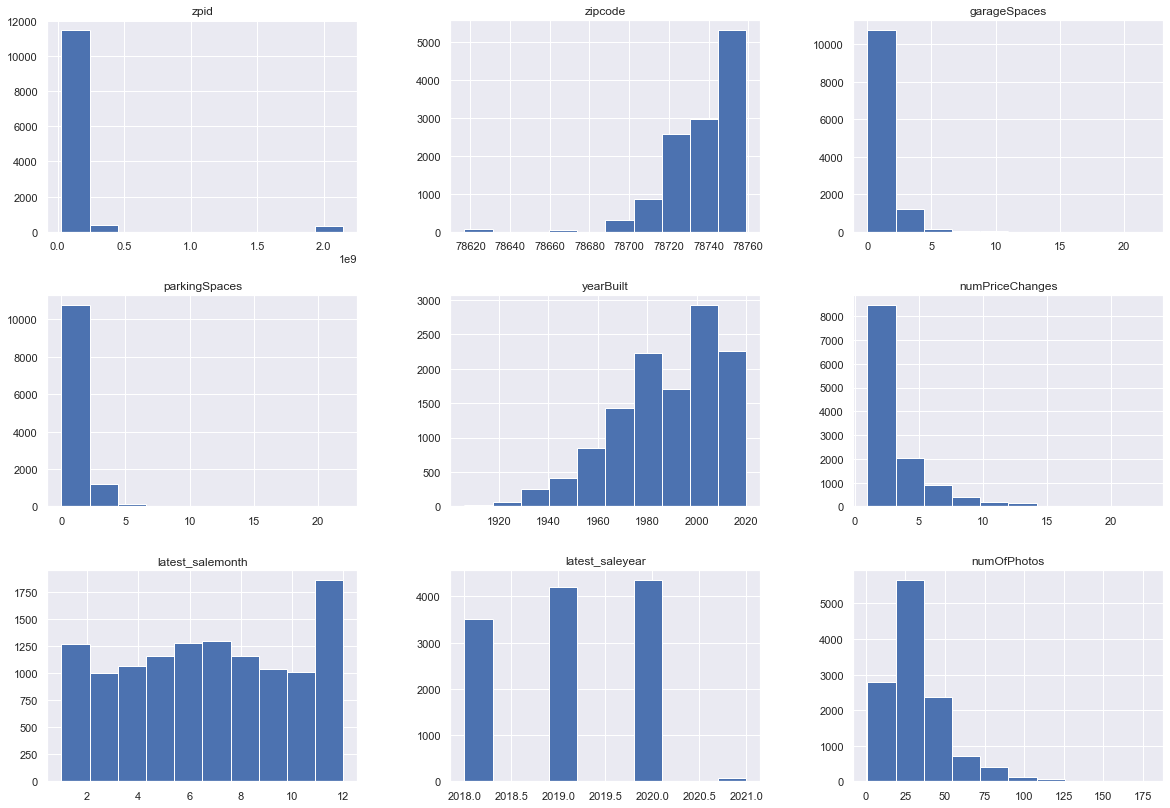

In [30]:
# filter and select columns to visualize
columns = X_train.select_dtypes("int").columns[:9]

# histogram of all selected columns
X_train[columns].hist(figsize=(20,14))

**Oberservation Notes**

- With garageSpaces, parkingSpaces, and numPriceChanges, most cases are closer to 0. It's rare to have values higher. Geometric distributions.

- ZipCode seems to have the most records close to 78760. As this data is for Austin, Texas, the area around zipcode 78760 is likely to be an area with many houses. (While ZipCodes are much more categorical in its usage, areas close to each other are often given ZipCodes with similar numbers. For exporation sake, I will treat it as continuous.)

- yearBuilt seems to be a negatively skewed distribution. Homes that are currently listed tend to be newer. After 1980 and after 2000 there seems to be some dips in number of cases.

- lastest_salemonth seems to be almost uniformaly distributed for most months with January and December both being oddly high.

- The numOfPhotos has a positively skewed distribution.

### Distributions of int datatypes (2)

array([[<AxesSubplot:title={'center':'numOfAccessibilityFeatures'}>,
        <AxesSubplot:title={'center':'numOfAppliances'}>,
        <AxesSubplot:title={'center':'numOfParkingFeatures'}>],
       [<AxesSubplot:title={'center':'numOfPatioAndPorchFeatures'}>,
        <AxesSubplot:title={'center':'numOfSecurityFeatures'}>,
        <AxesSubplot:title={'center':'numOfWaterfrontFeatures'}>],
       [<AxesSubplot:title={'center':'numOfWindowFeatures'}>,
        <AxesSubplot:title={'center':'numOfCommunityFeatures'}>,
        <AxesSubplot:title={'center':'numOfPrimarySchools'}>]],
      dtype=object)

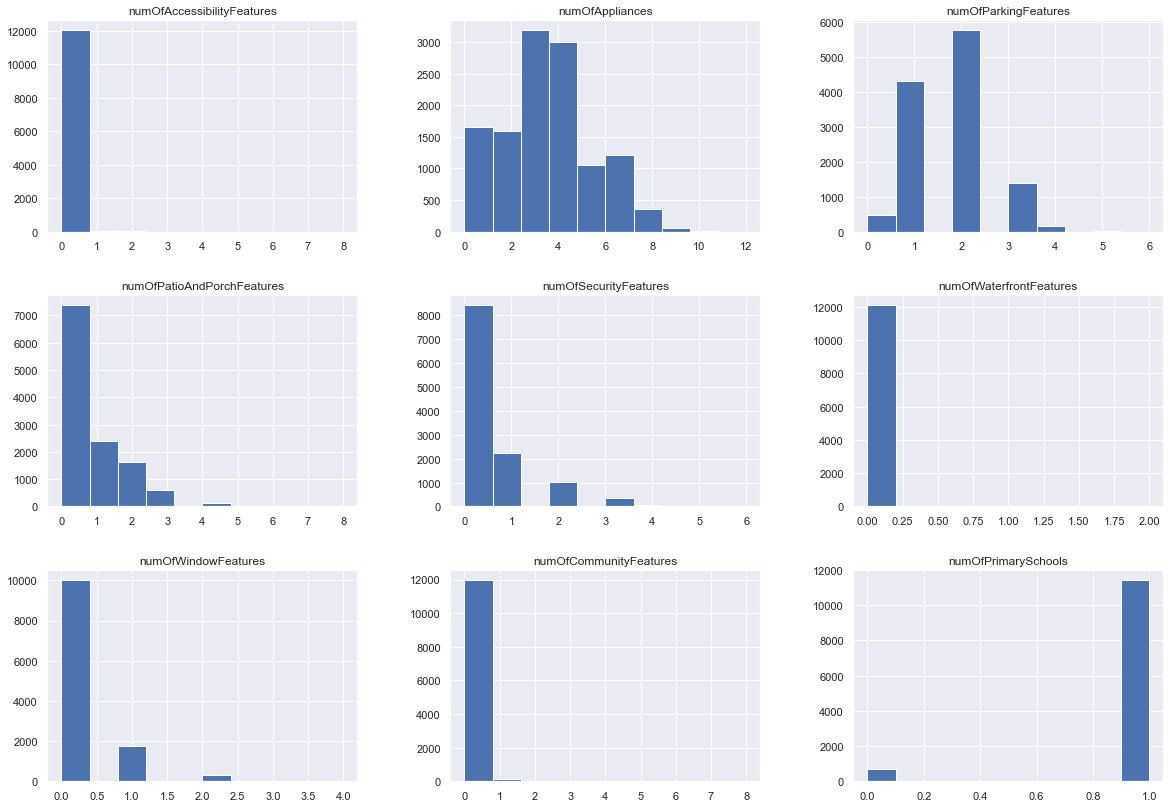

In [31]:
# filter and select columns to visualize
columns = X_train.select_dtypes("int").columns[9:18]

# histogram of all selected columns
X_train[columns].hist(figsize=(20,14))

**Oberservation Notes**

- The numOfAccessibilityFeatures, numOfCommunityFeatures, and numOfWaterfrontFeatures are commonly 0.

- More houses have a primary school nearby as opposed to none.

- numOfPatioAndPorchFeatures, numOfSecurityFeatures, and numOfWindowFeatures are also commonly 0, but it seems a fair number of houses have some. Positively skewed distribution. 

- The numberOfAppliances is positively skewed. The homes with more probably have higher prices.

All the homes with the rarer features probably have higher prices.

### Distributions of int datatypes (3)

array([[<AxesSubplot:title={'center':'numOfElementarySchools'}>,
        <AxesSubplot:title={'center':'numOfMiddleSchools'}>,
        <AxesSubplot:title={'center':'numOfHighSchools'}>],
       [<AxesSubplot:title={'center':'avgSchoolSize'}>,
        <AxesSubplot:title={'center':'MedianStudentsPerTeacher'}>,
        <AxesSubplot:title={'center':'numOfBedrooms'}>],
       [<AxesSubplot:title={'center':'numOfStories'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

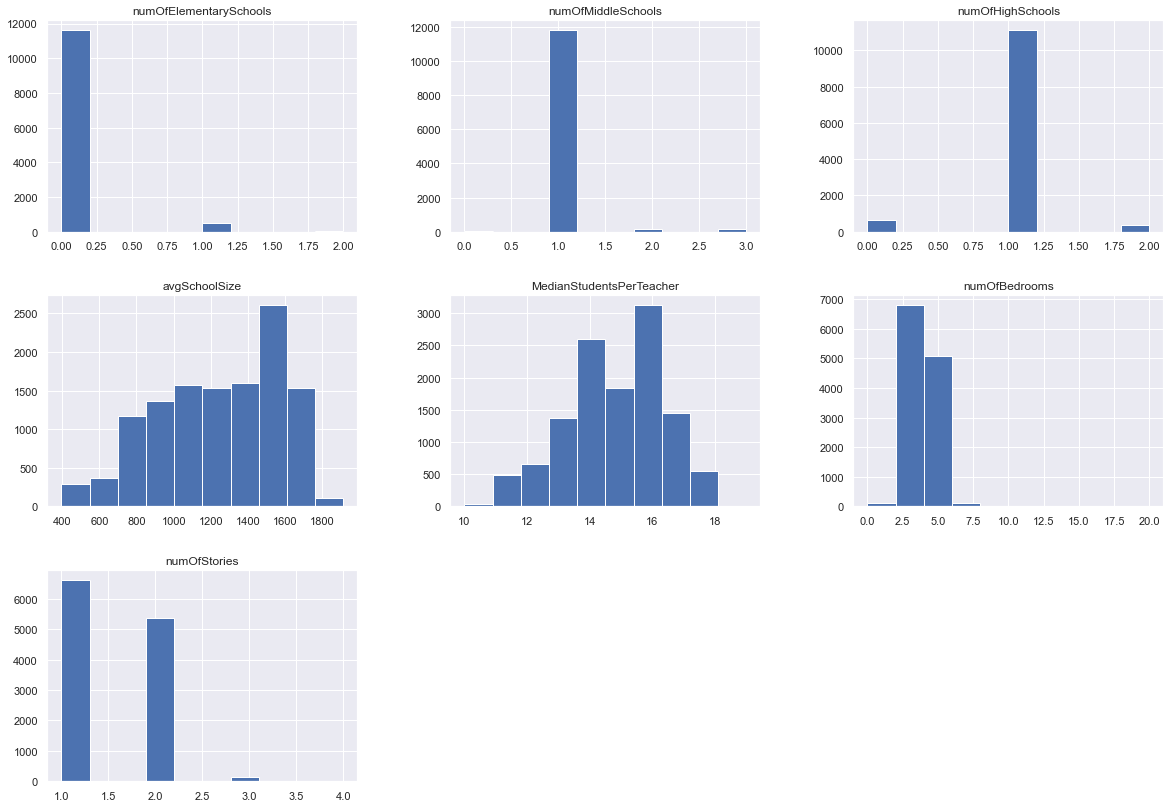

In [32]:
# filter and select columns to visualize
columns = X_train.select_dtypes("int").columns[18:27]

# histogram of all selected columns
X_train[columns].hist(figsize=(20,14))

**Oberservation Notes**

- NumberOfElementarySchools is mostly 0. Elementary schools and Primary schools should be combined.

- Most houses have a middle school and high school near them. Rarely some have more than 1.

- The average school size is negatively skewed, so a few schools might be very small while most have aboue 1500 students.

- The median students per teacher seem slightly negatively skewed and almost normally distributed.

- The number of bedrooms seem to be negatively skewed. It seems most homes 3 rooms.

- Most homes in texas have either 1 or 2 stories. The homes with 3 are probably pricier

### Histogram numOfBedrooms 

Getting a closer look

Text(0, 0.5, 'Count')

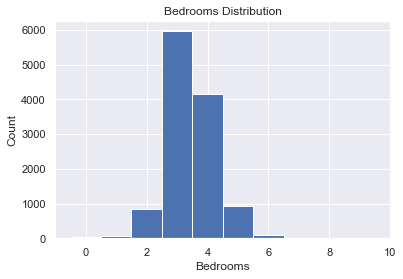

In [33]:
X_train["numOfBedrooms"].hist(bins=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                             align="left")

plt.title("Bedrooms Distribution")
plt.xlabel("Bedrooms")
plt.ylabel("Count")

**Oberservation Notes**

Most houses have 3 or 4 bedrooms. 

### Combine Training Sets

In [34]:
combined_train_set = pd.concat([X_train, y_train], axis=1)

# check records and features
print(combined_train_set.shape)

# check if cleaned_training_set is a dataframe
print(isinstance(combined_train_set, pd.DataFrame))

(12136, 47)
True


### Pairplots of float datatypes

Create pairplots

Create aboveMedian binary feature to visualize houses with above median prices

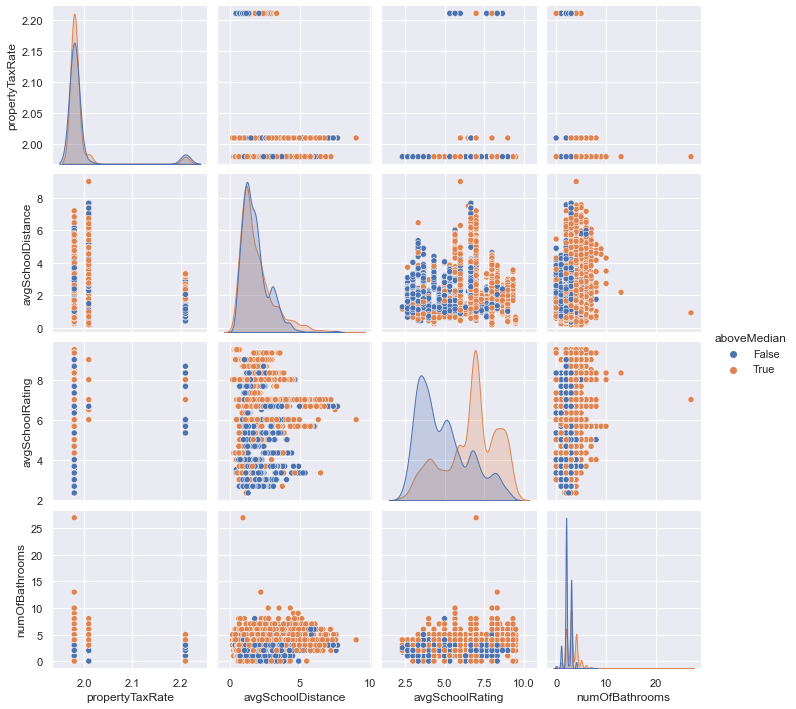

In [35]:
# select columns to visualize
float_columns = ["propertyTaxRate", 
                 "avgSchoolDistance", 
                 "avgSchoolRating", 
                 "numOfBathrooms", 
                 "latestPrice"]

# create df with only select floats
float_df = combined_train_set[float_columns]


# divide latest price into above and below median price for visualization purposes

house_median = np.median(float_df["latestPrice"])

float_df["aboveMedian"] = float_df["latestPrice"] > house_median

float_df = float_df.drop("latestPrice",axis=1)


# pair plot
sns.pairplot(float_df,
            hue="aboveMedian")

**Observation Notes:**

- As one would expect, houses above median price typically have more bathrooms

- Areas with higher school ratings are also typically above median price

- It seems propertyTaxRate and avgSchoolDistance does not have much correlation with housing price

### Observe "lotSizeSqFt"

There were some issues with this column before.

I will investigate.

In [36]:
# use describe and supress notation

X_train["lotSizeSqFt"].describe().apply(lambda x: format(x, 'f'))


count         12136.000000
mean         145839.415953
std        13699384.376778
min             100.000000
25%            6534.000000
50%            8276.000000
75%           10890.000000
max      1508482800.000000
Name: lotSizeSqFt, dtype: object

Text(0, 0.5, 'Latest Price')

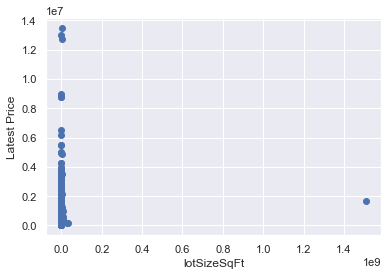

In [37]:
plt.scatter(X_train["lotSizeSqFt"],
           y_train)


plt.xlabel("lotSizeSqFt")
plt.ylabel("Latest Price")

**Oberservation Notes**

There is defintely an outlier with a huge lot size. To prevent data skewing it must be removed.

### Correlation Matrix

<AxesSubplot:>

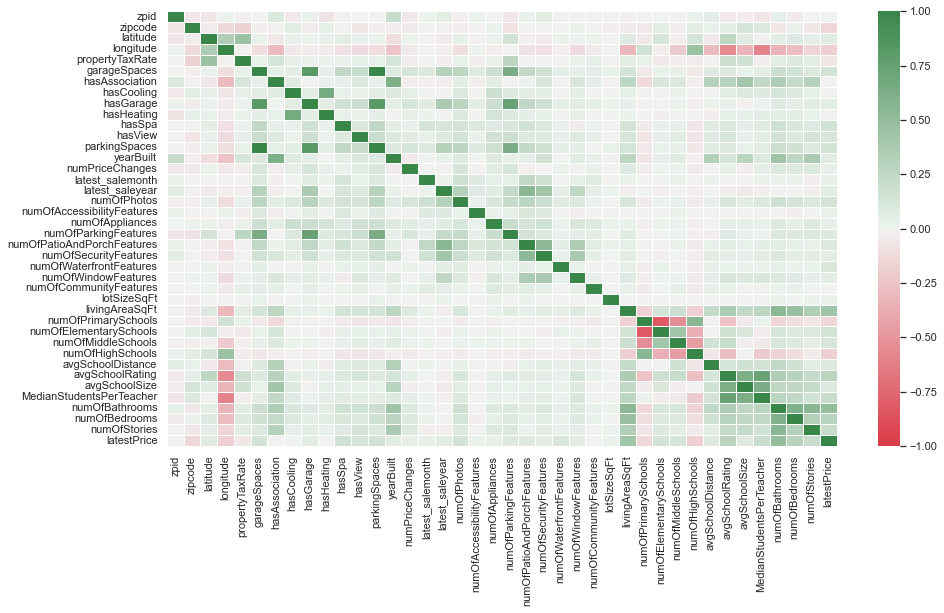

In [38]:
# calculate the correlation matrix
corr_matrix = combined_train_set.corr()

# set larger plot size
sns.set(rc = {'figure.figsize':(15,8)})

# Generate a custom diverging colormap
cmap = sns.diverging_palette(10, 133, as_cmap=True)

# plot the heatmap
sns.heatmap(corr_matrix,
#             annot=True,
            cmap=cmap,
            vmin=-1, 
            vmax=1,
            xticklabels=corr_matrix.columns,
            yticklabels=corr_matrix.columns,
            center=0,
            linewidths=.5)

**Observation Notes:**
    
- Number of primary and elementary schools have the strongest negative correlation (But these will be combined later size they are the same thing.)

- Garage spaces and Parking spaces are strongly positively correlation, which makes sense since garage space can count as parking space.

- hasGarage and Garage spaces are almost the same thing. Removing one might not be a huge deal.

- Longitude has a fairly strong negative correlation with student per teacher ratio, which might just be a coincidence, but it is interesting. 

- It seems the features that are more correlated with latestPrice are the size of the living area, school ratings, and number of bathrooms.

---

# Prepare the data

(Write functions for all data transformations applied.)

1) Data Cleaning

- Fix or remove outliers (optional)

- Imputate for missing values, drop rows, or drop columns

2) Feature selection (optional)

- Drop attributes that provide no useful information for the task.

3) Feature engineering where appropriate:

- Bin continuous features

- Decompose features (categorical, data/time, e.t.c.)

- Add promissing transformation of features (log, sqrt, ^2, e.t.c.)

- Aggregate features into promising new features

4) Feature scaling: Standardize or normalize features

### Data Cleaning

Remove lotsize outlier

In [39]:
def remove_max_outlier(X, y, column):
    
    maximum = X[column].max()
    
    outlier_filter = X[column] != maximum

    return X[outlier_filter], y[outlier_filter]
    

X_train, y_train = remove_max_outlier(X_train, y_train, "lotSizeSqFt")


# do the same on the test set just in case
X_test, y_test = remove_max_outlier(X_test, y_test, "lotSizeSqFt")


print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(12135, 46) (12135,)
(3034, 46) (3034,)


Remove houses not listed with city as "Austin."

In [40]:
def remove_non_matches(X, y, column, keepValue):
    
    keepRows = X[column] == keepValue
    
    X = X[keepRows]
    y = y[keepRows]
    
    return X, y
    

X_train, y_train = remove_non_matches(X_train, y_train, "city", "austin")


# do the same on the test set just in case
X_test, y_test = remove_non_matches(X_test, y_test, "city", "austin")


print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(12010, 46) (12010,)
(3008, 46) (3008,)


### Feature Selection

Drop attributes that provide no useful information for the task.

In [41]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12010 entries, 12377 to 6018
Data columns (total 46 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   zpid                        12010 non-null  int64  
 1   city                        12010 non-null  object 
 2   streetAddress               12010 non-null  object 
 3   zipcode                     12010 non-null  int64  
 4   description                 12010 non-null  object 
 5   latitude                    12010 non-null  float64
 6   longitude                   12010 non-null  float64
 7   propertyTaxRate             12010 non-null  float64
 8   garageSpaces                12010 non-null  int64  
 9   hasAssociation              12010 non-null  bool   
 10  hasCooling                  12010 non-null  bool   
 11  hasGarage                   12010 non-null  bool   
 12  hasHeating                  12010 non-null  bool   
 13  hasSpa                      

In [42]:
# Drop features

features = ["zpid", "streetAddress", "description",
           "hasGarage", "numOfPhotos", "homeImage", 
            "city", "latest_saledate", "latestPriceSource"]

X_train = X_train.drop(features, axis=1)
X_test = X_test.drop(features, axis=1)

print(X_train.shape, X_test.shape)

(12010, 37) (3008, 37)


In [43]:
X_train['numOfPrimarySchools'].value_counts()

1    11325
0      685
Name: numOfPrimarySchools, dtype: int64

In [44]:
X_train['numOfElementarySchools'].value_counts()

0    11489
1      477
2       44
Name: numOfElementarySchools, dtype: int64

**Primary and Elementary schools are the same thing. I will add the columns together**

In [45]:
def add_columns_together(X, col1, col2):
    
    newCol = X[col1] + X[col2]
    
    X = X.drop(col2, axis=1)
    
    X[col1] = newCol
    
    return X

X_train = add_columns_together(X_train, "numOfElementarySchools", "numOfPrimarySchools")
X_test = add_columns_together(X_test, "numOfElementarySchools", "numOfPrimarySchools")

print(X_train.shape, X_test.shape)

(12010, 36) (3008, 36)


### One-Hot Encode Categorical Features

In [46]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

X_train.head()

,zipcode,latitude,longitude,propertyTaxRate,garageSpaces,hasAssociation,hasCooling,hasHeating,hasSpa,hasView,homeType,parkingSpaces,yearBuilt,numPriceChanges,latest_salemonth,latest_saleyear,numOfAccessibilityFeatures,numOfAppliances,numOfParkingFeatures,numOfPatioAndPorchFeatures,numOfSecurityFeatures,numOfWaterfrontFeatures,numOfWindowFeatures,numOfCommunityFeatures,lotSizeSqFt,livingAreaSqFt,numOfElementarySchools,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories
12377,78748,30.179268,-97.805214,1.98,0,False,True,True,False,False,Single Family,0,1984,1,4,2018,0,3,1,0,0,0,0,0,6098.0,1079.0,1,1,1,1.333333,3.333333,1409,14,2.0,3,1
7023,78745,30.206968,-97.786041,1.98,8,False,True,True,False,True,Multiple Occupancy,8,1982,2,12,2019,0,2,3,0,0,0,0,0,8677.0,3870.0,1,1,1,0.633333,4.000000,925,14,8.0,8,2
3082,78731,30.367010,-97.767639,1.98,0,False,True,True,False,False,Single Family,0,1969,6,8,2018,0,3,1,0,0,0,0,0,9757.0,2002.0,1,1,1,0.933333,7.000000,1483,16,2.0,3,1
1113,78737,30.175116,-97.997772,2.01,0,True,True,True,False,True,Single Family,0,2006,2,7,2018,0,3,1,0,0,0,0,0,17424.0,3650.0,0,2,0,0.300000,8.000000,743,15,4.0,4,2
5096,78745,30.195215,-97.827843,1.98,2,True,True,True,True,False,Single Family,2,2013,3,11,2020,0,7,2,0,0,0,0,0,5706.0,1805.0,1,1,1,1.733333,4.000000,840,13,3.0,3,2


In [47]:
# One hot encode categorical features for the X_train and X_test sets

features_to_encode = ["homeType", "latest_salemonth", "latest_saleyear"]

X_train = pd.get_dummies(X_train, columns=features_to_encode, drop_first=True)
X_test = pd.get_dummies(X_test, columns=features_to_encode, drop_first=True)

X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12010 entries, 12377 to 6018
Data columns (total 56 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   zipcode                         12010 non-null  int64  
 1   latitude                        12010 non-null  float64
 2   longitude                       12010 non-null  float64
 3   propertyTaxRate                 12010 non-null  float64
 4   garageSpaces                    12010 non-null  int64  
 5   hasAssociation                  12010 non-null  bool   
 6   hasCooling                      12010 non-null  bool   
 7   hasHeating                      12010 non-null  bool   
 8   hasSpa                          12010 non-null  bool   
 9   hasView                         12010 non-null  bool   
 10  parkingSpaces                   12010 non-null  int64  
 11  yearBuilt                       12010 non-null  int64  
 12  numPriceChanges              

### Feature Scaling on Continuous Features

**Notes for Self:**

*Normalization or Min-Max Scaling*

- The process of scaling data into a range of 0 - 1.

- It's more useful and common for regression tasks.

- Useful when there are no outliers as it cannot cope up with them.

- Usually, we would scale age and not incomes because only a few people have high incomes but the age is close to uniform.

- It is really affected by outliers.

*Standardization or Z-Score Normalization*

- The process of scaling data so that they have a mean value of 0 and a standard deviation of 1.

- (Converts to Z-scores where they're units of standard deviation from the mean.)
    
- It's more useful and common for classification tasks.

- It is much less affected by outliers.

Sources:

- https://stackabuse.com/feature-scaling-data-with-scikit-learn-for-machine-learning-in-python/

- https://www.geeksforgeeks.org/normalization-vs-standardization/

In [48]:
# import packages needed --------------------------------------
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer


# declare features to scale or normalize ----------------------

# filter out the boolean and categorical features

bool_features = X_train.select_dtypes("bool").columns

numeric_features = [s for s in X_train.columns if not (s in bool_features) and not (s in features_to_encode)]


# Create functions to feature scale -------------------------

def StandardScaleFeatures(X):
    
    scaler = StandardScaler()

    X[numeric_features] = scaler.fit_transform(X[numeric_features])
    
    return X


# Use feature scaling -------------------------------------

X_train = StandardScaleFeatures(X_train)
X_test = StandardScaleFeatures(X_test)

print(X_train.shape)

(12010, 56)


#### Making sure feature scaling worked

Make sure all standard deviations are 1 or near 1

In [49]:
X_train.describe()

,zipcode,latitude,longitude,propertyTaxRate,garageSpaces,parkingSpaces,yearBuilt,numPriceChanges,numOfAccessibilityFeatures,numOfAppliances,numOfParkingFeatures,numOfPatioAndPorchFeatures,numOfSecurityFeatures,numOfWaterfrontFeatures,numOfWindowFeatures,numOfCommunityFeatures,lotSizeSqFt,livingAreaSqFt,numOfElementarySchools,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories,homeType_Condo,homeType_Mobile / Manufactured,homeType_MultiFamily,homeType_Multiple Occupancy,homeType_Other,homeType_Residential,homeType_Single Family,homeType_Townhouse,homeType_Vacant Land,latest_salemonth_2,latest_salemonth_3,latest_salemonth_4,latest_salemonth_5,latest_salemonth_6,latest_salemonth_7,latest_salemonth_8,latest_salemonth_9,latest_salemonth_10,latest_salemonth_11,latest_salemonth_12,latest_saleyear_2019,latest_saleyear_2020,latest_saleyear_2021
count,1.201000e+04,1.201000e+04,1.201000e+04,1.201000e+04,1.201000e+04,1.201000e+04,1.201000e+04,1.201000e+04,1.201000e+04,1.201000e+04,1.201000e+04,1.201000e+04,1.201000e+04,1.201000e+04,1.201000e+04,1.201000e+04,1.201000e+04,1.201000e+04,1.201000e+04,1.201000e+04,1.201000e+04,1.201000e+04,1.201000e+04,1.201000e+04,1.201000e+04,1.201000e+04,1.201000e+04,1.201000e+04,1.201000e+04,1.201000e+04,1.201000e+04,1.201000e+04,1.201000e+04,1.201000e+04,1.201000e+04,1.201000e+04,1.201000e+04,1.201000e+04,1.201000e+04,1.201000e+04,1.201000e+04,1.201000e+04,1.201000e+04,1.201000e+04,1.201000e+04,1.201000e+04,1.201000e+04,1.201000e+04,1.201000e+04,1.201000e+04,1.201000e+04
mean,4.453363e-13,-4.095096e-15,-5.894737e-14,-5.128500e-15,-4.185384e-16,2.660468e-16,2.343966e-15,1.893573e-16,-3.855714e-16,-2.619794e-16,-1.029337e-15,3.494291e-16,4.424622e-16,1.438293e-15,-1.253507e-17,1.101850e-15,-7.502210e-18,-1.017703e-16,-6.479575e-16,-1.262451e-15,5.605656e-17,-7.720718e-17,2.446003e-17,7.292714e-17,-4.988146e-17,-4.686324e-16,-3.941708e-17,1.762916e-15,8.452671e-16,-3.633300e-17,-2.534886e-16,-2.896032e-16,1.291258e-15,1.454972e-16,6.559560e-16,-1.663190e-15,3.529465e-16,-3.495770e-16,-8.948019e-16,8.845455e-16,-8.104073e-16,-6.335482e-16,8.780098e-17,-8.996134e-16,1.196933e-16,5.524677e-16,1.765264e-16,3.503720e-16,8.579315e-16,2.285895e-16,-1.929431e-15
std,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00
min,-5.374908e+00,-2.146858e+00,-2.889783e+00,-2.672123e-01,-9.094251e-01,-9.052512e-01,-3.833081e+00,-8.183397e-01,-7.356528e-02,-1.832315e+00,-2.170939e+00,-6.780374e-01,-5.678079e-01,-4.510193e-02,-4.278515e-01,-8.827570e-02,-5.086767e-02,-1.314499e+00,-7.544562e+00,-4.021928e+00,-3.373014e+00,-1.531467e+00,-1.871010e+00,-2.575800e+00,-2.793442e+00,-2.531511e+00,-4.030820e+00,-8.922341e-01,-1.770422e-01,-3.536271e-02,-2.581774e-02,-8.137202e-02,-1.825286e-02,-5.004172e-02,-3.908160e+00,-1.074187e-01,-7.545985e-02,-2.595492e-01,-3.002223e-01,-3.109719e-01,-3.247861e-01,-3.429653e-01,-3.461409e-01,-3.244727e-01,-3.057910e-01,-3.000575e-01,-2.841061e-01,-2.922404e-01,-7.270304e-01,-7.482933e-01,-7.085845e-02
25%,-6.290647e-01,-9.040079e-01,-6.979814e-01,-2.672123e-01,-9.094251e-01,-9.052512e-01,-6.671780e-01,-8.183397e-01,-7.356528e-02,-7.792908e-01,-9.044611e-01,-6.780374e-01,-5.678079e-01,-4.510193e-02,-4.278515e-01,-8.827570e-02,-3.564503e-02,-5.024089e-01,7.614360e-02,-1.343340e-01,7.933798e-02,-6.914946

---

# Short-list promising models

(If the data is huge, you may want to sample smaller training sets so you can train many different models in a reasonable time. Be aware that this penalizes complex models such as large neural nets or Random Forests).

(Try to automate these steps as much as possible.)

1) Train many quick and dirty models from different categories with default parameters

2) Measure and compare their performance.

3) For each model, use N-fold cross-validation and compute the mean and standard deviation of their performance.

4) Analyze the most significant variables for each algorithm.

5) Analyze the types of errors the models make.

- What data could be used to avoid these errors?

6) Have a quick round of feature selection and engineering.

7) Have one or two more quick iterations of the five previous steps.

8) Short-list the top three to five most promising models, preferring models that make different types of errors.

# Fine-Tune the System

(You will want to use as much data as possible for this step, especially as you move toward the end of fine-tuning.)

(As always automate what you can.)

1) Fine-tune the hyperparameters using cross-validation

- Treat your data transformation choices as hyperparameters, especially when you are not sure about them (e.g., should I replace missing values with zero or the median value? Or just drop the rows?).

- Unless there are very few hyperparamter values to explore, prefer random search over grid search. If training is very long, you may prefer a Bayesian optimization approach (e.g., using a Gaussian process priors, as described by Jasper Snoek, Hugo Larochelle, and Ryan Adams (https://goo.gl/PEFfGr))

2) Try Ensemble methods. Combining your best models will often perform better than running them invdividually.

3) Once you are confident about your final model, measure its performance on the test set to estimate the generalization error.

(Don't tweak your model after measuring the generalization error: you would just start overfitting the test set.)

# Present your solution

- Document what you have done.

- Create a nice presentation.

    - Make sure you highlight the big picture first.

- Explain why your solution achieves the business objective.

- Don't forget to present interesting points you noticed along the way.

    - Describe what worked and what did not.

    - List your assumptions and your system's limitations.

- Ensure your key findings are communicated through beautiful visualizations or easy-to-remember statements (e.g., "the median income is the number-one predictor of housing prices").